<a href="https://colab.research.google.com/github/Manmesh/Coffee-Shop-Sales/blob/main/FYP1CNN1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparing Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
from io import StringIO
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import timeseries_dataset_from_array

In [ ]:
import pandas as pd
import glob
import os


def process_text_to_dataframe(text_file_path):
    try:
        df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed

        #Rename columns
        for i in range(30):
          df.rename(columns={i+1 : "Real"+str(i+1)},inplace=True)
        df.rename(columns={0:"Time"},inplace=True)

        # Convert columns to numeric, handling potential errors
        for col in df.columns:
          df[col] = pd.to_numeric(df[col], errors='coerce')

        #Drop rows with any NaN values
        df.dropna(inplace=True)

        #Reset Index
        df.reset_index(drop=True,inplace=True)


        return df
    except pd.errors.EmptyDataError:
        print(f"Warning: Skipping empty file: {text_file_path}")
        return None
    except FileNotFoundError:
        print(f"Warning: File not found: {text_file_path}")
        return None

text_files_dir = "/content/drive/MyDrive/FYP/project dataset/Training dataset" # Update this path if necessary

txt_files = glob.glob(os.path.join(text_files_dir, "*.TXT"))

dataframes = {}

for file in txt_files:
    txt_name = os.path.splitext(os.path.basename(file))[0]  # Extract filename without extension
    df = process_text_to_dataframe(file)
    if df is not None:
        dataframes[txt_name] = df

print("Processing complete")



<ipython-input-4-cdffc4f1ec2e>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed
<ipython-input-4-cdffc4f1ec2e>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed
<ipython-input-4-cdffc4f1ec2e>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed
<ipython-input-4-cdffc

Processing complete


In [ ]:
import pickle

with open('dataframes.pkl', 'wb') as f:
    pickle.dump(dataframes, f)

In [ ]:

import pickle

with open("dataframes.pkl", "rb") as f:  # "rb" = read binary mode
    dataframes = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FYP/dataframes.pkl'

In [ ]:
for i in dataframes:
  print(int(i))
  print(dataframes[i])

NameError: name 'dataframes' is not defined

262144 rows in one dataframe

# **Damaged** **Dataframes**

## **Function**

In [ ]:
def create_damaged_dataframe(dataframes):
  dfc= pd.DataFrame()
  dfc = pd.concat([dfc,pd.DataFrame(dataframes['00']["Time"])],axis=1)

  for i in dataframes:
    if(i!="00"):
      j=int(i)
      y=pd.Series(dataframes[i].iloc[:,j])
      dfc=pd.concat([dfc,y],axis=1)

  damaged_df = dfc
  damaged_df["Label"] = 1

  return damaged_df

## **Steps**

In [ ]:
dfc= pd.DataFrame()
dfc = pd.concat([dfc,pd.DataFrame(dataframes['00']["Time"])],axis=1)

In [ ]:
for i in dataframes:
  if(i!="00"):
    j=int(i)
    y=pd.Series(dataframes[i].iloc[:,j])
    dfc=pd.concat([dfc,y],axis=1)

In [ ]:
damaged = dfc
damaged["Label"] = 1

In [ ]:
damaged.to_pickle("damaged.pkl")

In [ ]:
import pickle
with open('damaged.pkl', 'rb') as f:
  damaged = pickle.load(f)

In [ ]:
path = "/content/drive/MyDrive/FYP/project dataset"
with open(path + "/damaged.pkl", 'rb') as f:
  damaged = pickle.load(f)

In [ ]:
import numpy as np
np.random.randint(0,2)


1

# **Undamaged** **DataFrame**

## **Function**

In [ ]:
def create_undamaged_dataframe(dataframes):
  dfs = pd.DataFrame()
  dfs=pd.concat([dfs,dataframes['00']])

  for i in dataframes:
    if(i!="00"):
      x=dataframes[i]
      x["Real"+str(int(i))]=None
      dfs=pd.concat([dfs,x],ignore_index=True)

    dfs = dfs.apply(lambda col: pd.Series(col.dropna().tolist() + [None] * (len(col) - col.count())))
    Undamaged_df = dfs.drop("Time",axis=1).dropna()
    Undamaged_df["Label"] = 0

  return Undamaged_df

## **Normal**

In [ ]:
dfs = pd.DataFrame()
dfs=pd.concat([dfs,dataframes['00']])

In [ ]:
for i in dataframes:
  if(i!="00"):
    x=dataframes[i]
    x["Real"+str(int(i))]=None
    dfs=pd.concat([dfs,x],ignore_index=True)

<ipython-input-9-8a38d0b66759>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs=pd.concat([dfs,x],ignore_index=True)


In [ ]:
dfs = dfs.apply(lambda col: pd.Series(col.dropna().tolist() + [None] * (len(col) - col.count())))

In [ ]:
Undamaged = dfs.drop("Time",axis=1).dropna()

In [ ]:
Undamaged["Label"] = 0

In [ ]:
path = "/content/drive/MyDrive/FYP/project dataset"
Undamaged.to_pickle(path + "/Undamaged.pkl")

In [ ]:
with open('Undamaged.pkl','rb') as f:
  Undamaged = pickle.load(f)

In [ ]:
path = "/content/drive/MyDrive/FYP/project dataset"
with open(path + "/Undamaged.pkl", 'rb') as f:
  Undamaged = pickle.load(f)

# **Creating** **Frames**

## **Function**

In [3]:
def create_frames(damaged_df,Undamaged_df,i):
  dataset = damaged_df['Real' + str(int(i))].to_numpy()
  targett = damaged_df['Label'].to_numpy()

  Damaged_frames = timeseries_dataset_from_array(
      data = dataset[:]
    , targets = targett[:]
    , sequence_length = 128
    , sequence_stride = 128
    , sampling_rate = 1
    , batch_size = None
  )

  dataset = Undamaged_df['Real' + str(int(i))].to_numpy()
  targett = Undamaged_df['Label'].to_numpy()

  Undamaged_frames = timeseries_dataset_from_array(
      data = dataset[:]
    , targets = targett[:]
    , sequence_length = 128
    , sequence_stride = 128
    , sampling_rate = 1
    , batch_size = None
  )

  Undamaged_frames = Undamaged_frames.shuffle(buffer_size=Undamaged_frames.cardinality())
  undamged_frames = Undamaged_frames.take(Damaged_frames.cardinality())
  training_dataset = undamged_frames.concatenate(Damaged_frames)
  dataset1 = training_dataset.shuffle(buffer_size=training_dataset.cardinality())


  training_dataset1 = dataset1.shuffle(buffer_size=dataset1.cardinality())
  validation_dataset = training_dataset1.take(0.3*dataset1.cardinality().numpy())
  training_dataset1 = training_dataset1.skip(0.3*dataset1.cardinality().numpy())

  training_dataset1 = training_dataset1.map(lambda x, y: (reshape_element(x), tf.reshape(tf.keras.utils.to_categorical(y, num_classes=2), [1,2])))
  validation_dataset = validation_dataset.map(lambda x, y: (reshape_element(x), tf.reshape(tf.keras.utils.to_categorical(y, num_classes=2), [1,2])))

  return training_dataset1, validation_dataset

## **Normal**

In [ ]:
dataset = damaged['Real1'].to_numpy()
targett = damaged['Label'].to_numpy()


Damaged_frames = timeseries_dataset_from_array(
      data = dataset[:]
    , targets = targett[:]
    , sequence_length = 128
    , sequence_stride = 128
    , sampling_rate = 1
    , batch_size = None

)

In [ ]:

print(Damaged_frames.cardinality())


tf.Tensor(8, shape=(), dtype=int64)


In [ ]:
count = 0
for x, y in Damaged_frames:
    count+=1
print(count)

8


In [ ]:
dataset = Undamaged['Real1'].to_numpy()
targett = Undamaged['Label'].to_numpy()

Undamaged_frames = timeseries_dataset_from_array(
    data = dataset[:],
    targets = targett[:],
    sequence_length = 128,
    sequence_stride = 128,
    sampling_rate = 1,
    batch_size = None

)

In [ ]:
for samples,targets in Undamaged_frames.take(1):
  print(samples.shape)
  print(targets.shape)

(1024,)
()


In [ ]:
shuffled_undamged_dataset =  Undamaged_frames.shuffle(buffer_size=Undamaged_frames.cardinality())

In [ ]:
print(shuffled_undamged_dataset.cardinality())
print(Damaged_frames.cardinality())

tf.Tensor(61440, shape=(), dtype=int64)
tf.Tensor(2048, shape=(), dtype=int64)


In [ ]:
undamged_frames = shuffled_undamged_dataset.take(Damaged_frames.cardinality())
print(undamged_frames.cardinality())


tf.Tensor(2048, shape=(), dtype=int64)


In [ ]:
training_dataset = undamged_frames.concatenate(Damaged_frames)

In [ ]:
print(training_dataset.cardinality())

tf.Tensor(4096, shape=(), dtype=int64)


In [ ]:
'''
 8 batches
 64 timeseries
 1024 length
 '''


'\n 8 batches \n 64 timeseries\n 1024 length\n '

# **Building Model**

## **Normal**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization, Activation, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
training_dataset1 = training_dataset.shuffle(buffer_size=training_dataset.cardinality())
#training_dataset1 = normalize_dataset(training_dataset)
validation_dataset = training_dataset1.take(0.3*training_dataset.cardinality().numpy())
training_dataset1 = training_dataset1.skip(0.3*training_dataset.cardinality().numpy())

In [ ]:
print(training_dataset1.cardinality())

tf.Tensor(12, shape=(), dtype=int64)


In [4]:
def reshape_element(tensor):
  num_elemets = tf.size(tensor)
  dim1 = int(num_elemets/128)

  return tf.reshape(tensor, [dim1,128,1])

In [ ]:
training_dataset1 = training_dataset1.map(lambda x, y: (reshape_element(x), tf.reshape(tf.keras.utils.to_categorical(y, num_classes=2), [1,2])))
validation_dataset = validation_dataset.map(lambda x, y: (reshape_element(x), tf.reshape(tf.keras.utils.to_categorical(y, num_classes=2), [1,2])))

In [ ]:
print(training_dataset1.cardinality())
print(validation_dataset.cardinality())

tf.Tensor(2868, shape=(), dtype=int64)
tf.Tensor(1228, shape=(), dtype=int64)


In [ ]:
print(study.best_trial.params)

{'filters1': 32, 'kernel_size1': 3, 'activation1': 'tanh', 'filters2': 256, 'kernel_size2': 5, 'activation2': 'tanh', 'dense_units': 64, 'learning_rate': 2.7272465040480404e-05}


In [ ]:
model = Sequential()
model.add(InputLayer(shape=(128,1)))
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(keras.layers.Conv1D(filters=256, kernel_size=5, padding='same', activation='tanh'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
#model.add(keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(2))


In [ ]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=2.7272465040480404e-05), metrics=['accuracy'])


In [ ]:
history = model.fit(training_dataset1, epochs=10, validation_data=validation_dataset,shuffle=True,batch_size=64)

Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9458 - loss: 0.1759 - val_accuracy: 0.8436 - val_loss: 0.6146
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 92s 16ms/step - accuracy: 0.9462 - loss: 0.1721 - val_accuracy: 0.8428 - val_loss: 0.6346
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.9461 - loss: 0.1603 - val_accuracy: 0.8640 - val_loss: 0.5418
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9524 - loss: 0.1422 - val_accuracy: 0.8347 - val_loss: 0.7541
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9506 - loss: 0.1519 - val_accuracy: 0.8306 - val_loss: 0.6733
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9528 - loss: 0.1478 - val_accuracy: 0.8217 - val_loss: 0.8528
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 91s 15ms/step - accuracy: 0.9566 - loss: 0.1199 - val_accuracy: 0.8314 - val_loss: 0.9744
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 74s 12ms/step - accuracy: 0.9609 -

In [ ]:
model.save("modell1.h5")

## **Function**

In [ ]:
def reshape_element(tensor):
  num_elemets = tf.size(tensor)
  dim1 = int(num_elemets/128)

  return tf.reshape(tensor, [dim1,128,1])

In [ ]:
def create_model(dataset1):

  training_dataset1 = dataset1.shuffle(buffer_size=dataset1.cardinality())
  validation_dataset = training_dataset1.take(0.3*dataset1.cardinality().numpy())
  training_dataset1 = training_dataset1.skip(0.3*dataset1.cardinality().numpy())

  training_dataset1 = training_dataset1.map(lambda x, y: (reshape_element(x), tf.reshape(tf.keras.utils.to_categorical(y, num_classes=2), [1,2])))
  validation_dataset = validation_dataset.map(lambda x, y: (reshape_element(x), tf.reshape(tf.keras.utils.to_categorical(y, num_classes=2), [1,2])))

  model = Sequential()
  model.add(InputLayer(shape=(1024,1)))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='tanh'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(BatchNormalization())
  model.add(keras.layers.Conv1D(filters=256, kernel_size=5, padding='same', activation='tanh'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(BatchNormalization())
  #model.add(keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(keras.layers.MaxPooling1D(pool_size=2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(2, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=2.7272465040480404e-05), metrics=['accuracy'])

  history = model.fit(training_dataset1, epochs=10, validation_data=validation_dataset,shuffle = True)

  return model, history


In [ ]:
!pip install optuna
!pip install optuna-integration[tfkeras]

import optuna
from optuna.integration import TFKerasPruningCallback
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def create_model(trial):


    model = Sequential()
    model.add(InputLayer(input_shape=(128, 1)))

    # Define hyperparameter search space
    filters1 = trial.suggest_categorical('filters1', [32, 64, 128])
    kernel_size1 = trial.suggest_categorical('kernel_size1', [3, 5])
    activation1 = trial.suggest_categorical('activation1', ['relu', 'tanh'])

    filters2 = trial.suggest_categorical('filters2', [64, 128, 256])
    kernel_size2 = trial.suggest_categorical('kernel_size2', [3, 5])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'tanh'])

    dense_units = trial.suggest_categorical('dense_units', [64, 128, 256])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    model.add(Conv1D(filters=filters1, kernel_size=kernel_size1, padding='same', activation=activation1))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=filters2, kernel_size=kernel_size2, padding='same', activation=activation2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy'],

    )
    return model


def objective(trial):
    # Load your data (replace with your actual data loading)
    # ... (your data loading code here) ...
    # Assuming training_dataset1 and validation_dataset are defined

    model = create_model(trial)

    # Use TFKerasPruningCallback to prune unpromising trials
    pruning_callback = TFKerasPruningCallback(trial, 'val_accuracy')

    history = model.fit(training_dataset1, epochs=10, validation_data=validation_dataset, callbacks=[pruning_callback],batch_size=64,shuffle=True)

    return history.history['val_accuracy'][-1] # Return the last validation accuracy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

[I 2025-03-09 10:04:50,215] A new study created in memory with name: no-name-b9256e9e-627a-4bf5-b416-b1092b727b75


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2868/2868 ━━━━━━━━━━━━━━━━━━━━ 69s 20ms/step - accuracy: 0.6289 - loss: 0.7408 - val_accuracy: 0.7932 - val_loss: 0.4541
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 79s 19ms/step - accuracy: 0.8097 - loss: 0.4611 - val_accuracy: 0.8298 - val_loss: 0.4131
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 73s 16ms/step - accuracy: 0.8257 - loss: 0.4195 - val_accuracy: 0.8550 - val_loss: 0.3459
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 89s 18ms/step - accuracy: 0.8424 - loss: 0.3959 - val_accuracy: 0.8738 - val_loss: 0.3457
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - accuracy: 0.8575 - loss: 0.3484 - val_accuracy: 0.8575 - val_loss: 0.4253
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 80s 16ms/step - accuracy: 0.8679 - loss: 0.3244 - val_accuracy: 0.8559 - val_loss: 0.3240
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.8931 - loss: 0.2749 - val_accuracy: 0.8331 - val_loss: 0.4332
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 64s 19ms/step - accuracy: 0.9020 - loss: 0.24

[I 2025-03-09 10:16:46,097] Trial 0 finished with value: 0.8363192081451416 and parameters: {'filters1': 32, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 256, 'kernel_size2': 3, 'activation2': 'tanh', 'dense_units': 256, 'learning_rate': 0.0003035277571609268}. Best is trial 0 with value: 0.8363192081451416.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.6346 - loss: 0.6821 - val_accuracy: 0.8135 - val_loss: 0.4504
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.8185 - loss: 0.4202 - val_accuracy: 0.7997 - val_loss: 0.4483
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 84s 14ms/step - accuracy: 0.8372 - loss: 0.3779 - val_accuracy: 0.8314 - val_loss: 0.3888
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.8728 - loss: 0.3220 - val_accuracy: 0.8208 - val_loss: 0.4320
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8887 - loss: 0.2783 - val_accuracy: 0.8062 - val_loss: 0.5541
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.8916 - loss: 0.2750 - val_accuracy: 0.8135 - val_loss: 0.4299
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 48s 14ms/step - accuracy: 0.9019 - loss: 0.2767 - val_accuracy: 0.7948 - val_loss: 0.5344
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accuracy: 0.8778 -

[I 2025-03-09 10:24:48,367] Trial 1 finished with value: 0.8403908610343933 and parameters: {'filters1': 64, 'kernel_size1': 5, 'activation1': 'relu', 'filters2': 64, 'kernel_size2': 5, 'activation2': 'tanh', 'dense_units': 256, 'learning_rate': 0.0008904193074300631}. Best is trial 1 with value: 0.8403908610343933.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 57s 15ms/step - accuracy: 0.5593 - loss: 0.8716 - val_accuracy: 0.6083 - val_loss: 0.6457
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - accuracy: 0.6531 - loss: 0.6651 - val_accuracy: 0.7533 - val_loss: 0.5572
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.7561 - loss: 0.5560 - val_accuracy: 0.8379 - val_loss: 0.4199
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.8016 - loss: 0.4633 - val_accuracy: 0.8086 - val_loss: 0.4987
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 60s 18ms/step - accuracy: 0.8194 - loss: 0.4473 - val_accuracy: 0.8559 - val_loss: 0.3793
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.8335 - loss: 0.4043 - val_accuracy: 0.8510 - val_loss: 0.4038
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.8440 - loss: 0.3778 - val_accuracy: 0.8274 - val_loss: 0.4784
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 73s 15ms/step - accuracy: 0.8766 -

[I 2025-03-09 10:37:42,035] Trial 2 finished with value: 0.7923452854156494 and parameters: {'filters1': 128, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 256, 'kernel_size2': 5, 'activation2': 'relu', 'dense_units': 128, 'learning_rate': 0.001843978821301695}. Best is trial 1 with value: 0.8403908610343933.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.6598 - loss: 0.7968 - val_accuracy: 0.7443 - val_loss: 0.5191
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - accuracy: 0.7681 - loss: 0.5120 - val_accuracy: 0.8282 - val_loss: 0.4173
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 71s 12ms/step - accuracy: 0.8128 - loss: 0.4588 - val_accuracy: 0.8412 - val_loss: 0.4785
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.8397 - loss: 0.3908 - val_accuracy: 0.8200 - val_loss: 0.5178
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8555 - loss: 0.3631 - val_accuracy: 0.7964 - val_loss: 0.5165
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8716 - loss: 0.3279 - val_accuracy: 0.8314 - val_loss: 0.6255
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.8657 - loss: 0.3159 - val_accuracy: 0.7915 - val_loss: 0.8262
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.8939 -

[I 2025-03-09 10:48:04,254] Trial 3 finished with value: 0.757328987121582 and parameters: {'filters1': 32, 'kernel_size1': 5, 'activation1': 'relu', 'filters2': 128, 'kernel_size2': 3, 'activation2': 'relu', 'dense_units': 256, 'learning_rate': 0.001601204533113096}. Best is trial 1 with value: 0.8403908610343933.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.5066 - loss: 0.7480 - val_accuracy: 0.6254 - val_loss: 0.6629
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.6334 - loss: 0.6475 - val_accuracy: 0.6930 - val_loss: 0.5991
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.7135 - loss: 0.5811 - val_accuracy: 0.7598 - val_loss: 0.5284
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - accuracy: 0.7631 - loss: 0.5399 - val_accuracy: 0.7785 - val_loss: 0.4966
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.8080 - loss: 0.4833 - val_accuracy: 0.7899 - val_loss: 0.4647
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - accuracy: 0.8054 - loss: 0.4591 - val_accuracy: 0.8127 - val_loss: 0.4517
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8412 - loss: 0.4161 - val_accuracy: 0.8168 - val_loss: 0.4291
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 51s 12ms/step - accuracy: 0.8492 - loss

[I 2025-03-09 10:55:19,476] Trial 4 finished with value: 0.8306189179420471 and parameters: {'filters1': 64, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 64, 'kernel_size2': 5, 'activation2': 'tanh', 'dense_units': 64, 'learning_rate': 2.1211110018300193e-05}. Best is trial 1 with value: 0.8403908610343933.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.6384 - loss: 0.6523 - val_accuracy: 0.8217 - val_loss: 0.4189
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.8271 - loss: 0.4329 - val_accuracy: 0.8583 - val_loss: 0.3486
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 73s 9ms/step - accuracy: 0.8365 - loss: 0.3960 - val_accuracy: 0.8428 - val_loss: 0.3795
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8429 - loss: 0.3844 - val_accuracy: 0.8827 - val_loss: 0.3149
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8764 - loss: 0.3079 - val_accuracy: 0.8265 - val_loss: 0.5368
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8794 - loss: 0.2974 - val_accuracy: 0.8070 - val_loss: 0.6440
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.9027 - loss: 0.2372 - val_accuracy: 0.8241 - val_loss: 0.5578
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 72s 10ms/step - accuracy: 0.9211 - lo

[I 2025-03-09 11:04:01,549] Trial 5 finished with value: 0.8094462752342224 and parameters: {'filters1': 32, 'kernel_size1': 5, 'activation1': 'tanh', 'filters2': 128, 'kernel_size2': 5, 'activation2': 'relu', 'dense_units': 64, 'learning_rate': 0.0007550846828524345}. Best is trial 1 with value: 0.8403908610343933.


Epoch 1/10
2866/2868 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6190 - loss: 1.1158

[I 2025-03-09 11:05:08,434] Trial 6 pruned. Trial was pruned at epoch 0.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5234 - loss: 0.7419

[I 2025-03-09 11:05:49,672] Trial 7 pruned. Trial was pruned at epoch 0.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 77s 23ms/step - accuracy: 0.6250 - loss: 1.0715 - val_accuracy: 0.7744 - val_loss: 0.5317
Epoch 2/10
2866/2868 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7496 - loss: 0.5705

[I 2025-03-09 11:08:29,966] Trial 8 pruned. Trial was pruned at epoch 1.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.6461 - loss: 0.6758 - val_accuracy: 0.7858 - val_loss: 0.5185
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.7874 - loss: 0.5164 - val_accuracy: 0.8388 - val_loss: 0.4173
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8356 - loss: 0.4099 - val_accuracy: 0.8607 - val_loss: 0.3169
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.8522 - loss: 0.3877 - val_accuracy: 0.8697 - val_loss: 0.3505
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8725 - loss: 0.3216 - val_accuracy: 0.8436 - val_loss: 0.3519
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8721 - loss: 0.3324 - val_accuracy: 0.8770 - val_loss: 0.3396
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8846 - loss: 0.2954 - val_accuracy: 0.8461 - val_loss: 0.4697
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.9205 - loss: 0

[I 2025-03-09 11:15:10,062] Trial 9 finished with value: 0.8688924908638 and parameters: {'filters1': 32, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 64, 'kernel_size2': 5, 'activation2': 'relu', 'dense_units': 64, 'learning_rate': 0.0013985320644800303}. Best is trial 9 with value: 0.8688924908638.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.6258 - loss: 0.6746 - val_accuracy: 0.7883 - val_loss: 0.5031
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.7865 - loss: 0.5014 - val_accuracy: 0.7516 - val_loss: 0.5146
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8281 - loss: 0.4103 - val_accuracy: 0.7744 - val_loss: 0.5563
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 51s 11ms/step - accuracy: 0.8386 - loss: 0.4124 - val_accuracy: 0.8094 - val_loss: 0.5113
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8457 - loss: 0.3776 - val_accuracy: 0.7638 - val_loss: 0.5170
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.8725 - loss: 0.3317 - val_accuracy: 0.8078 - val_loss: 0.4976
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.8672 - loss: 0.3305 - val_accuracy: 0.8135 - val_loss: 0.4302
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.8790 - los

for model number: 9
Number of finished trials: 10
Best trial: {'filters1': 32, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 64, 'kernel_size2': 5, 'activation2': 'relu', 'dense_units': 64, 'learning_rate': 0.0013985320644800303}


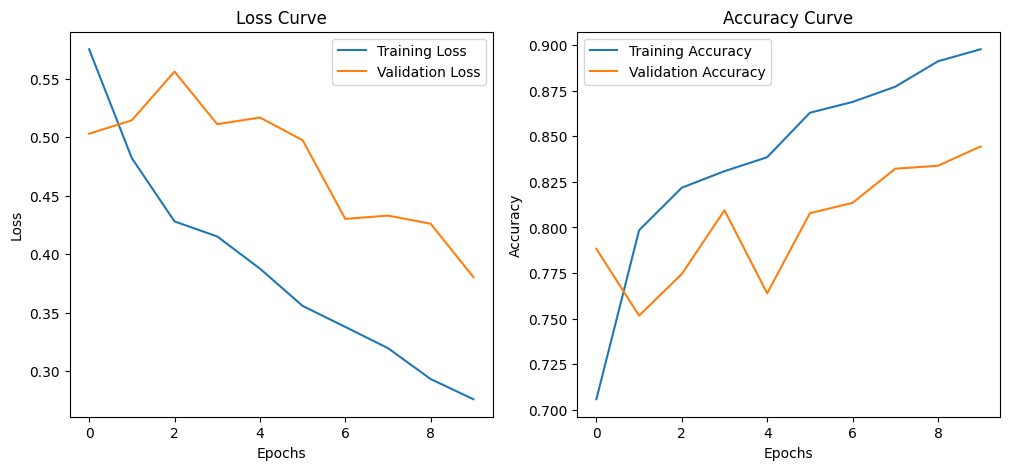

In [ ]:
#path = "/content/drive/MyDrive/FYP/project dataset/Model"
path = "/content/drive/MyDrive/FYP/project dataset/Modell/"
imgpath = "/content/drive/MyDrive/FYP/project dataset/Images/"
study = {}

for i in range(9,10):
  training_dataset1,validation_dataset = create_frames(damaged,Undamaged,i)

  study[i] = optuna.create_study(direction='maximize')  # Maximize validation accuracy
  study[i].optimize(objective, n_trials=10) # Adjust n_trials as needed

  best_params = study[i].best_params
  model = create_model(study[i].best_trial)
  history = model.fit(training_dataset1, epochs=10, validation_data=validation_dataset,shuffle=True,batch_size=64)

  with open(path + str(i)+"study.pkl", 'wb') as f:
    pickle.dump(study[i], f)

  print('for model number:',i)
  print('Number of finished trials:', len(study[i].trials))
  print('Best trial:', study[i].best_trial.params)
  model.save(path+ str(i)+"model.h5")

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Loss Curve
  plt.sca(axes[0])
  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss Curve")
  plt.legend()
  plt.savefig(imgpath+ str(i)+"Loss.png")


    # Accuracy Curve
  plt.sca(axes[1])
  plt.plot(history.history["accuracy"], label="Training Accuracy")
  plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Accuracy Curve")
  plt.legend()
  plt.savefig(imgpath+ str(i)+"Accuracy.png")



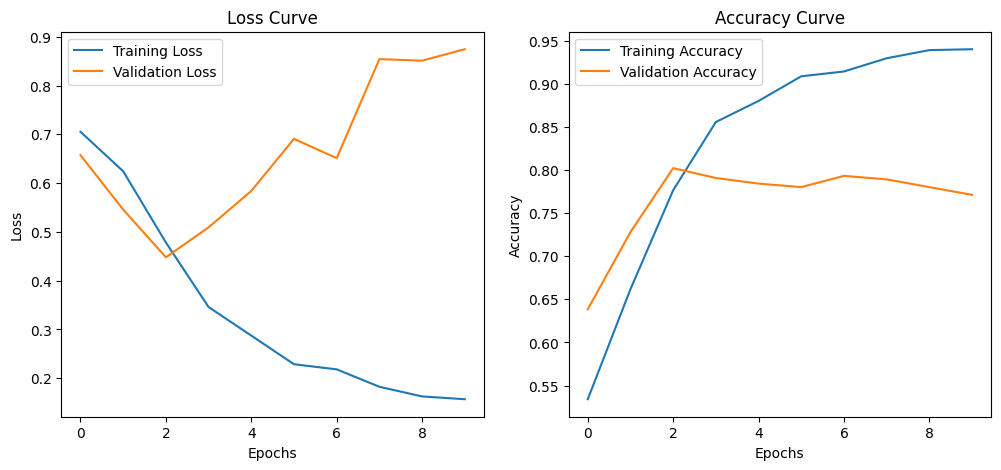

In [ ]:
imgpath = "/content/drive/MyDrive/FYP/project dataset/Images/"

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.sca(axes[0])
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
#plt.savefig(imgpath+ str(i)+"Loss.png")



plt.sca(axes[1])
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
#plt.savefig(imgpath+ str(i)+"Accuracy.png")





# **Hyperparameter** **Tuning**

In [ ]:
# prompt: use optuna to tune the hyperparameters

!pip install optuna
!pip install optuna-integration[tfkeras]

import optuna
from optuna.integration import TFKerasPruningCallback
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    model = Sequential()
    model.add(InputLayer(input_shape=(128, 1)))

    # Define hyperparameter search space
    filters1 = trial.suggest_categorical('filters1', [32, 64, 128])
    kernel_size1 = trial.suggest_categorical('kernel_size1', [3, 5])
    activation1 = trial.suggest_categorical('activation1', ['relu', 'tanh'])

    filters2 = trial.suggest_categorical('filters2', [64, 128, 256])
    kernel_size2 = trial.suggest_categorical('kernel_size2', [3, 5])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'tanh'])

    dense_units = trial.suggest_categorical('dense_units', [64, 128, 256])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    model.add(Conv1D(filters=filters1, kernel_size=kernel_size1, padding='same', activation=activation1))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=filters2, kernel_size=kernel_size2, padding='same', activation=activation2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model


def objective(trial):
    # Load your data (replace with your actual data loading)
    # ... (your data loading code here) ...
    # Assuming training_dataset1 and validation_dataset are defined

    model = create_model(trial)

    # Use TFKerasPruningCallback to prune unpromising trials
    pruning_callback = TFKerasPruningCallback(trial, 'val_accuracy')

    history = model.fit(training_dataset1, epochs=10, validation_data=validation_dataset, callbacks=[pruning_callback])

    return history.history['val_accuracy'][-1] # Return the last validation accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize validation accuracy
study.optimize(objective, n_trials=10) # Adjust n_trials as needed

# Print the best hyperparameters
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 1.9 MB/s eta 0:00:00


[I 2025-03-06 10:53:27,884] A new study created in memory with name: no-name-ddd2a0b3-41a9-4036-9275-ddd6422544ea


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2868/2868 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.5009 - loss: 0.7769 - val_accuracy: 0.5529 - val_loss: 0.6954
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.6100 - loss: 0.6685 - val_accuracy: 0.5888 - val_loss: 0.6820
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.6606 - loss: 0.6248 - val_accuracy: 0.6490 - val_loss: 0.6480
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.7437 - loss: 0.5554 - val_accuracy: 0.6588 - val_loss: 0.6208
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.7891 - loss: 0.5005 - val_accuracy: 0.6906 - val_loss: 0.5980
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - accuracy: 0.8291 - loss: 0.4383 - val_accuracy: 0.6539 - val_loss: 0.6607
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8619 - loss: 0.3843 - val_accuracy: 0.6311 - val_loss: 0.7938
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.8668 - loss: 0.3572 -

[I 2025-03-06 11:00:23,503] Trial 0 finished with value: 0.6604234576225281 and parameters: {'filters1': 64, 'kernel_size1': 3, 'activation1': 'tanh', 'filters2': 64, 'kernel_size2': 3, 'activation2': 'relu', 'dense_units': 64, 'learning_rate': 6.215676155524827e-05}. Best is trial 0 with value: 0.6604234576225281.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.4891 - loss: 0.8207 - val_accuracy: 0.4959 - val_loss: 0.6940
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.4804 - loss: 0.6940 - val_accuracy: 0.5163 - val_loss: 0.6926
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - accuracy: 0.5075 - loss: 0.6935 - val_accuracy: 0.5114 - val_loss: 0.6924
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 79s 14ms/step - accuracy: 0.4995 - loss: 0.6937 - val_accuracy: 0.4967 - val_loss: 0.6941
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.4743 - loss: 0.6939 - val_accuracy: 0.4951 - val_loss: 0.6951
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 73s 10ms/step - accuracy: 0.4936 - loss: 0.6935 - val_accuracy: 0.4992 - val_loss: 0.6933
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.4914 - loss: 0.6939 - val_accuracy: 0.5098 - val_loss: 0.6930
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.5009 -

[I 2025-03-06 11:09:55,986] Trial 1 finished with value: 0.4861563444137573 and parameters: {'filters1': 32, 'kernel_size1': 5, 'activation1': 'tanh', 'filters2': 64, 'kernel_size2': 5, 'activation2': 'tanh', 'dense_units': 256, 'learning_rate': 0.00379998451468742}. Best is trial 0 with value: 0.6604234576225281.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.5055 - loss: 0.9263 - val_accuracy: 0.4381 - val_loss: 0.8716
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.5069 - loss: 0.6988 - val_accuracy: 0.4796 - val_loss: 0.6915
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.5086 - loss: 0.6940 - val_accuracy: 0.4829 - val_loss: 0.6957
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.4876 - loss: 0.6952 - val_accuracy: 0.5261 - val_loss: 0.6901
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 53s 14ms/step - accuracy: 0.4936 - loss: 0.6945 - val_accuracy: 0.5114 - val_loss: 0.6956
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.4770 - loss: 0.7171 - val_accuracy: 0.4951 - val_loss: 0.6962
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - accuracy: 0.4940 - loss: 0.6947 - val_accuracy: 0.4927 - val_loss: 0.6935
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 72s 11ms/step - accuracy: 0.5086 -

[I 2025-03-06 11:19:09,310] Trial 2 finished with value: 0.49267101287841797 and parameters: {'filters1': 128, 'kernel_size1': 3, 'activation1': 'tanh', 'filters2': 64, 'kernel_size2': 3, 'activation2': 'tanh', 'dense_units': 256, 'learning_rate': 0.008555680135182861}. Best is trial 0 with value: 0.6604234576225281.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.5116 - loss: 0.7841 - val_accuracy: 0.6612 - val_loss: 0.6488
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 89s 15ms/step - accuracy: 0.6562 - loss: 0.6392 - val_accuracy: 0.7142 - val_loss: 0.5957
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.7722 - loss: 0.5479 - val_accuracy: 0.7647 - val_loss: 0.5335
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.8471 - loss: 0.4394 - val_accuracy: 0.8005 - val_loss: 0.4887
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 82s 15ms/step - accuracy: 0.8740 - loss: 0.3723 - val_accuracy: 0.8322 - val_loss: 0.4197
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9017 - loss: 0.3115 - val_accuracy: 0.8160 - val_loss: 0.4064
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 52s 15ms/step - accuracy: 0.9204 - loss: 0.2543 - val_accuracy: 0.8542 - val_loss: 0.3637
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9400 -

[I 2025-03-06 11:29:50,318] Trial 3 finished with value: 0.8900651335716248 and parameters: {'filters1': 64, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 128, 'kernel_size2': 5, 'activation2': 'relu', 'dense_units': 128, 'learning_rate': 3.4413055926835155e-05}. Best is trial 3 with value: 0.8900651335716248.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - accuracy: 0.5000 - loss: 0.9257 - val_accuracy: 0.5212 - val_loss: 0.6905
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - accuracy: 0.4879 - loss: 0.6944 - val_accuracy: 0.4927 - val_loss: 0.6916
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.4996 - loss: 0.6938 - val_accuracy: 0.4935 - val_loss: 0.6945
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 58s 17ms/step - accuracy: 0.5063 - loss: 0.6939 - val_accuracy: 0.4845 - val_loss: 0.6939
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 74s 15ms/step - accuracy: 0.4853 - loss: 0.6941 - val_accuracy: 0.5073 - val_loss: 0.6920
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 81s 14ms/step - accuracy: 0.5060 - loss: 0.6936 - val_accuracy: 0.4919 - val_loss: 0.6968
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 49s 14ms/step - accuracy: 0.5191 - loss: 0.6931 - val_accuracy: 0.5016 - val_loss: 0.6924
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - accuracy: 0.4863 -

[I 2025-03-06 11:40:59,934] Trial 4 finished with value: 0.5252442955970764 and parameters: {'filters1': 128, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 128, 'kernel_size2': 3, 'activation2': 'tanh', 'dense_units': 256, 'learning_rate': 0.004761485493292469}. Best is trial 3 with value: 0.8900651335716248.


Epoch 1/10
2867/2868 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5380 - loss: 0.7546

[I 2025-03-06 11:41:55,411] Trial 5 pruned. Trial was pruned at epoch 0.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.5190 - loss: 0.7434 - val_accuracy: 0.6099 - val_loss: 0.6389
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.6676 - loss: 0.6197 - val_accuracy: 0.7581 - val_loss: 0.5254
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 80s 12ms/step - accuracy: 0.7791 - loss: 0.4852 - val_accuracy: 0.7606 - val_loss: 0.4852
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.8480 - loss: 0.3684 - val_accuracy: 0.8168 - val_loss: 0.4106
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.8537 - loss: 0.3291 - val_accuracy: 0.8469 - val_loss: 0.3559
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8842 - loss: 0.2795 - val_accuracy: 0.8836 - val_loss: 0.2654
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 91s 16ms/step - accuracy: 0.9184 - loss: 0.2333 - val_accuracy: 0.8363 - val_loss: 0.4128
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 81s 15ms/step - accuracy: 0.9282 -

[I 2025-03-06 11:52:26,739] Trial 6 finished with value: 0.9014657735824585 and parameters: {'filters1': 128, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 128, 'kernel_size2': 3, 'activation2': 'tanh', 'dense_units': 128, 'learning_rate': 9.490950117421339e-05}. Best is trial 6 with value: 0.9014657735824585.


Epoch 1/10
2863/2868 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5004 - loss: 0.9276

[I 2025-03-06 11:53:10,786] Trial 7 pruned. Trial was pruned at epoch 0.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 78s 23ms/step - accuracy: 0.5507 - loss: 0.7843 - val_accuracy: 0.6637 - val_loss: 0.6151
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 76s 24ms/step - accuracy: 0.7188 - loss: 0.5576 - val_accuracy: 0.7166 - val_loss: 0.5648
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 74s 23ms/step - accuracy: 0.8162 - loss: 0.4076 - val_accuracy: 0.7932 - val_loss: 0.4992
Epoch 4/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 71s 22ms/step - accuracy: 0.8905 - loss: 0.2704 - val_accuracy: 0.7997 - val_loss: 0.6191
Epoch 5/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9200 - loss: 0.2072 - val_accuracy: 0.8233 - val_loss: 0.5654
Epoch 6/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 90s 25ms/step - accuracy: 0.9310 - loss: 0.1817 - val_accuracy: 0.8070 - val_loss: 0.6525
Epoch 7/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9456 - loss: 0.1464 - val_accuracy: 0.8518 - val_loss: 0.4852
Epoch 8/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 75s 21ms/step - accuracy: 0.9565 -

[I 2025-03-06 12:06:32,652] Trial 8 finished with value: 0.8558632135391235 and parameters: {'filters1': 64, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 256, 'kernel_size2': 5, 'activation2': 'relu', 'dense_units': 256, 'learning_rate': 8.207848960077745e-05}. Best is trial 6 with value: 0.9014657735824585.


Epoch 1/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 43s 10ms/step - accuracy: 0.5226 - loss: 0.7521 - val_accuracy: 0.5985 - val_loss: 0.6639
Epoch 2/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.6168 - loss: 0.6560 - val_accuracy: 0.6564 - val_loss: 0.6366
Epoch 3/10
2868/2868 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.7820 - loss: 0.4706 - val_accuracy: 0.5366 - val_loss: 1.7866
Epoch 4/10
2864/2868 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8583 - loss: 0.3308

[I 2025-03-06 12:09:12,967] Trial 9 pruned. Trial was pruned at epoch 3.


Number of finished trials: 10
Best trial: {'filters1': 128, 'kernel_size1': 3, 'activation1': 'relu', 'filters2': 128, 'kernel_size2': 3, 'activation2': 'tanh', 'dense_units': 128, 'learning_rate': 9.490950117421339e-05}


In [ ]:
# prompt: print the best parameters

print('Best trial:', study.best_trial.params)


Best trial: {'filters1': 32, 'kernel_size1': 3, 'activation1': 'tanh', 'filters2': 256, 'kernel_size2': 5, 'activation2': 'tanh', 'dense_units': 64, 'learning_rate': 2.7272465040480404e-05}


In [ ]:
#for best_parameters in study.best_params:
 # print(best_parameters,best_parameters.values)

print(study.best_trial.para)

[FrozenTrial(number=8, state=1, values=[0.9901960492134094], datetime_start=datetime.datetime(2025, 3, 6, 7, 10, 5, 94981), datetime_complete=datetime.datetime(2025, 3, 6, 7, 11, 34, 183078), params={'filters1': 32, 'kernel_size1': 3, 'activation1': 'tanh', 'filters2': 256, 'kernel_size2': 5, 'activation2': 'tanh', 'dense_units': 64, 'learning_rate': 2.7272465040480404e-05}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.7124183177947998, 1: 0.7973856329917908, 2: 0.7124183177947998, 3: 0.8823529481887817, 4: 0.9019607901573181, 5: 0.9346405267715454, 6: 0.9052287340164185, 7: 0.9738562107086182, 8: 0.9607843160629272, 9: 0.9901960492134094}, distributions={'filters1': CategoricalDistribution(choices=(32, 64, 128)), 'kernel_size1': CategoricalDistribution(choices=(3, 5)), 'activation1': CategoricalDistribution(choices=('relu', 'tanh')), 'filters2': CategoricalDistribution(choices=(64, 128, 256)), 'kernel_size2': CategoricalDistribution(choices=(3, 5)), 'activation2': Categor

# **Testing**

In [ ]:
import pandas as pd
import glob
import os


def process_text_to_dataframe(text_file_path):
    try:
        df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed

        #Rename columns
        for i in range(30):
          df.rename(columns={i+1 : "Real"+str(i+1)},inplace=True)
        df.rename(columns={0:"Time"},inplace=True)

        # Convert columns to numeric, handling potential errors
        for col in df.columns:
          df[col] = pd.to_numeric(df[col], errors='coerce')

        #Drop rows with any NaN values
        df.dropna(inplace=True)

        #Reset Index
        df.reset_index(drop=True,inplace=True)


        return df
    except pd.errors.EmptyDataError:
        print(f"Warning: Skipping empty file: {text_file_path}")
        return None
    except FileNotFoundError:
        print(f"Warning: File not found: {text_file_path}")
        return None

text_files_dir = "/content/drive/MyDrive/FYP/testing dataset" # Update this path if necessary

txt_files = glob.glob(os.path.join(text_files_dir, "*.TXT"))

testing_dataframes = {}

for file in txt_files:
    txt_name = os.path.splitext(os.path.basename(file))[0]
    df = process_text_to_dataframe(file)
    if df is not None:
        testing_dataframes[txt_name] = df

print("Processing complete")



<ipython-input-28-1a8f141cc762>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed
<ipython-input-28-1a8f141cc762>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed
<ipython-input-28-1a8f141cc762>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file_path, sep='\t', header=None, skiprows=9)  # Adjust separator and header as needed
<ipython-input-28-1

Processing complete


In [6]:
path = "/content/drive/MyDrive/FYP"

with open(path + "/testing_dataframes.pkl", "rb") as f:
   testing_dataframes = pickle.load(f)

In [ ]:
import pickle
path = "/content/drive/MyDrive/FYP"
with open("testing_dataframes.pkl", "rb") as f:  # "rb" = read binary mode
    testing_dataframes = pickle.load(f)


UnpicklingError: pickle data was truncated

In [ ]:
for i in testing_dataframes:
  print(int(i))
  print(testing_dataframes[i])

0
              Time     Real1     Real2     Real3     Real4     Real5  \
0         0.000000 -0.002573  0.002551  0.005629  0.003094  0.009774   
1         0.000977 -0.007446  0.010772  0.008882  0.010901  0.000644   
2         0.001953  0.000031  0.010872 -0.015066  0.011164  0.010199   
3         0.002930  0.016592 -0.041346 -0.015978 -0.037837  0.024687   
4         0.003906 -0.055603  0.017845  0.015853  0.017365 -0.039019   
...            ...       ...       ...       ...       ...       ...   
262139  255.995100 -0.268191  0.011797  0.274653 -0.181622 -0.105322   
262140  255.996100 -0.075638  0.095522 -0.197687  0.080191  0.008157   
262141  255.997100  0.175800 -0.266318  0.002634 -0.064270 -0.196158   
262142  255.998000 -0.006392  0.148666 -0.106904 -0.152027  0.123507   
262143  255.999000 -0.150891 -0.004177 -0.203810  0.016838 -0.012516   

           Real6     Real7     Real8     Real9  ...    Real21    Real22  \
0      -0.000099 -0.003692 -0.033917 -0.000830  ... -0.003

## **Data for testing**

In [ ]:
x = testing_dataframes["00"]["Real1"].to_numpy()

In [ ]:
# prompt: predict the x data in the model with prediction as 0 or 1

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import timeseries_dataset_from_array
import numpy as np

# Assuming 'x' is already defined as in your provided code
# x = testing_dataframes["01"]["Real1"].to_numpy()

# Reshape x for the model
def reshape_element(tensor):
  num_elemets = tf.size(tensor)
  dim1 = int(num_elemets/1024)
  return tf.reshape(tensor, [dim1,1024,1])

x_reshaped = reshape_element(tf.constant(x, dtype=tf.float32))


# Make predictions
predictions = model.predict(x_reshaped)

# Get predicted classes (0 or 1)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_data = pd.DataFrame()

for i in testing_dataframes:
  test_data = pd.concat([test_data,testing_dataframes[i]],ignore_index=True)


KeyboardInterrupt: 

In [ ]:
with open('test_data.pkl', 'wb') as f:
    pickle.dump(test_data, f)

In [ ]:
with open('test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
test_data = testing_dataframes["17"]

In [7]:
def create_test_frame(i):

  dataset = test_data["Real"+str(int(i))].to_numpy()

  test_frame = timeseries_dataset_from_array(
      data = dataset[:],
      targets = None
    , sequence_length = 128
    , sequence_stride = 128
    , sampling_rate = 1
    , batch_size = None
  )

  return test_frame


# **POD**

In [8]:
POD = {}
Damage_detected = {}
frames_detected = {}


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


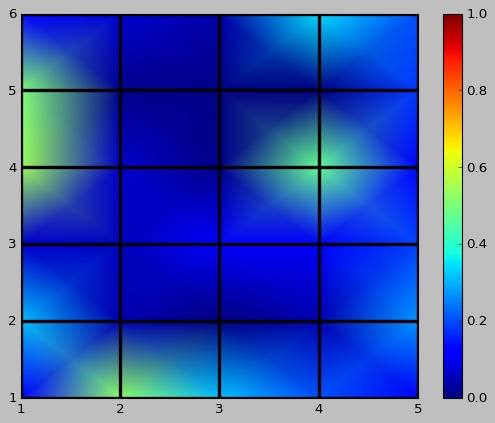

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


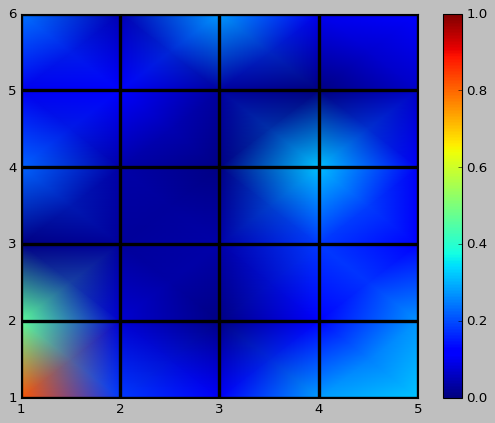

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


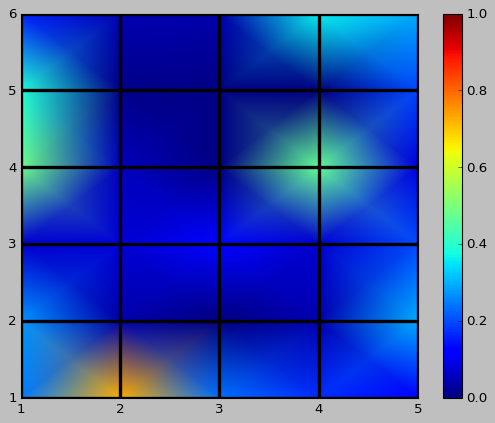

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


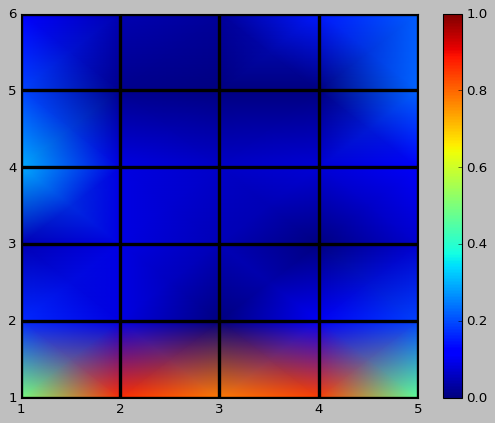

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


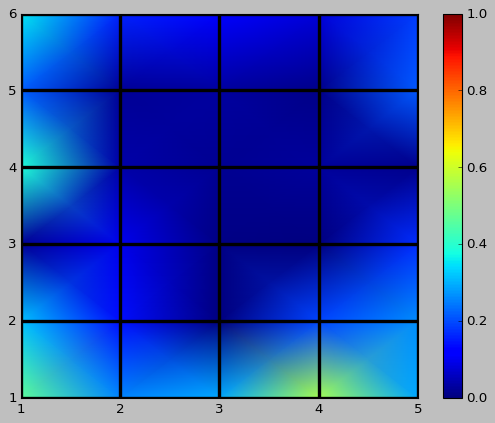

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


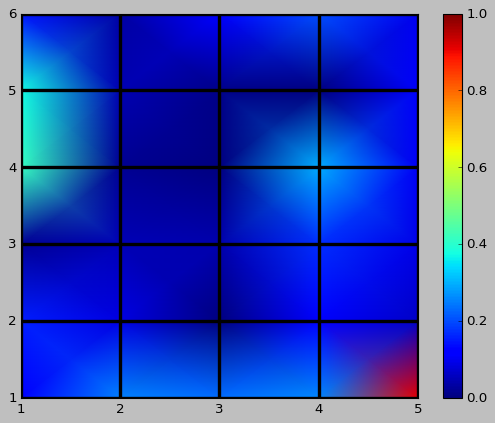

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


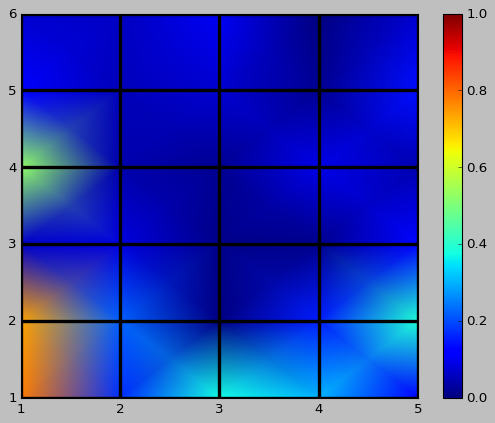

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


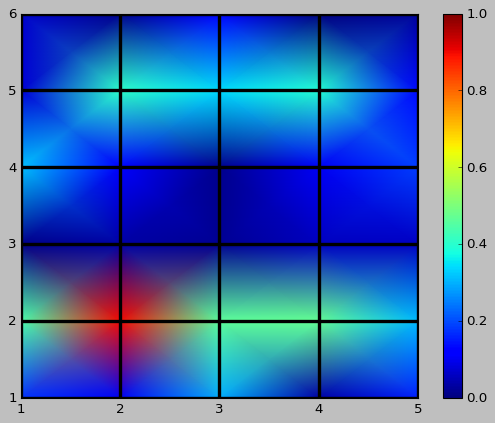

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


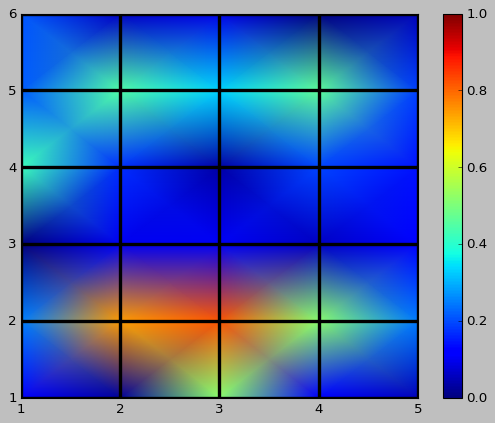

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


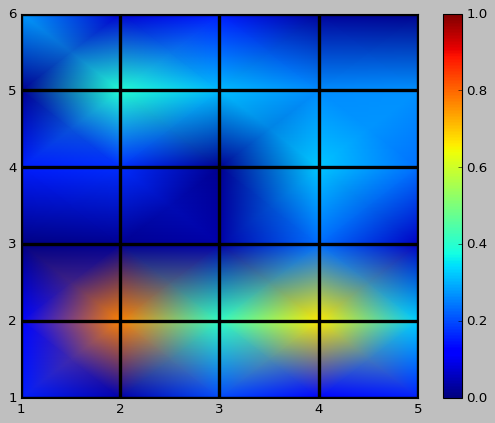

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


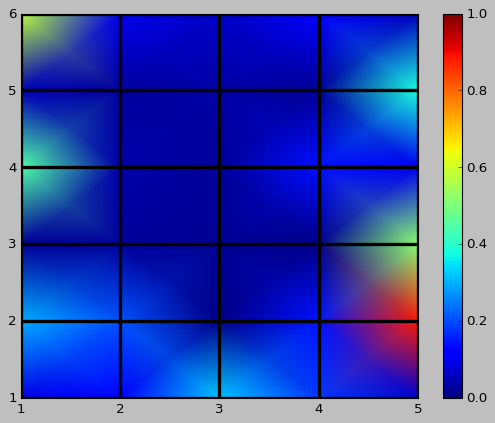

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


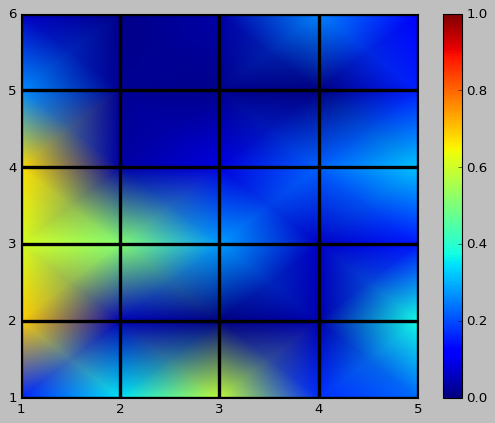

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


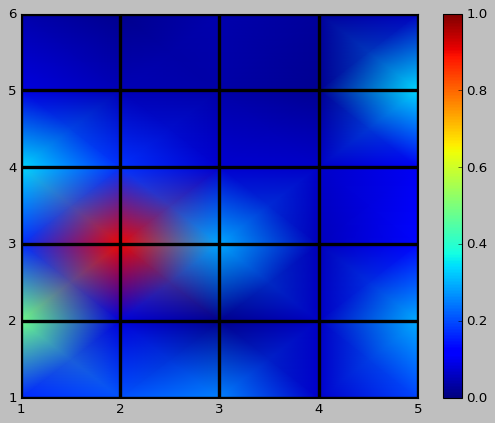

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


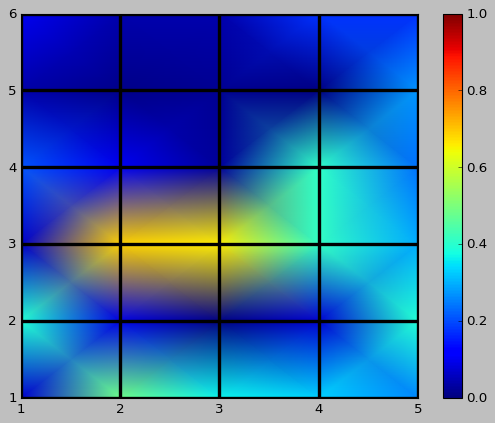

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


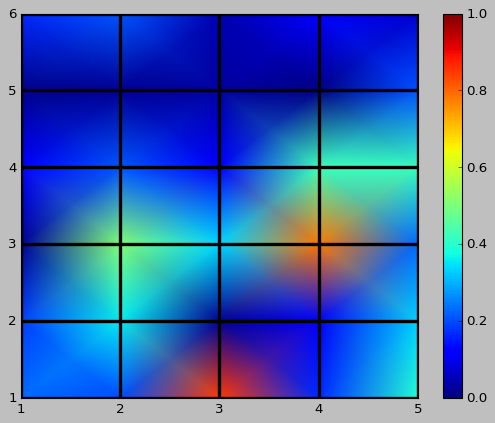

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


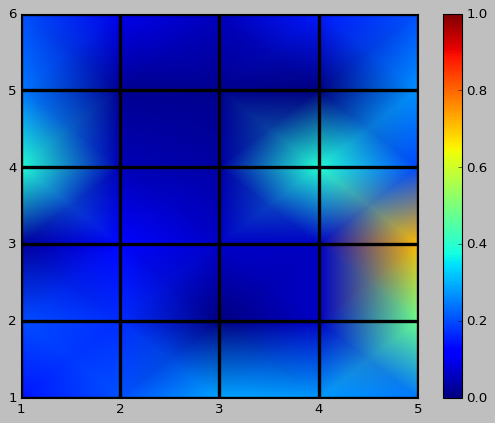

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


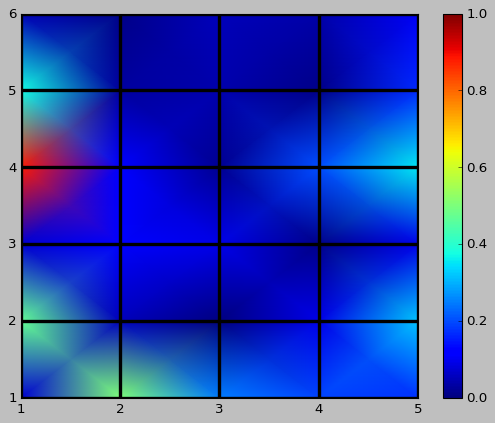

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


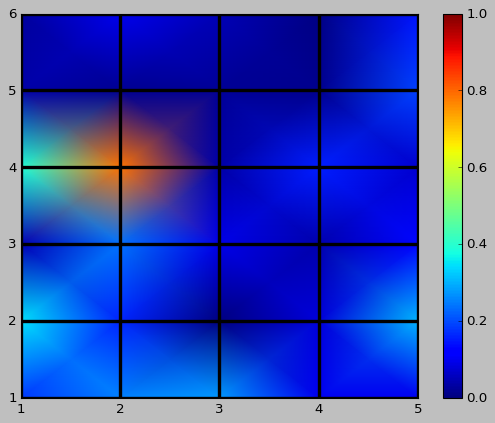

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


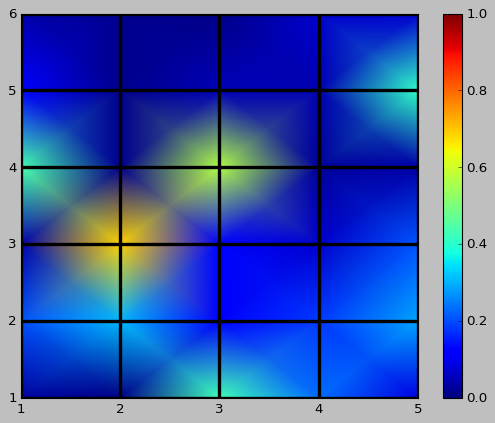

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


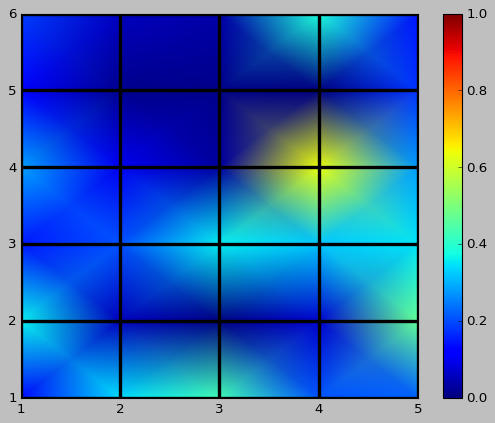

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


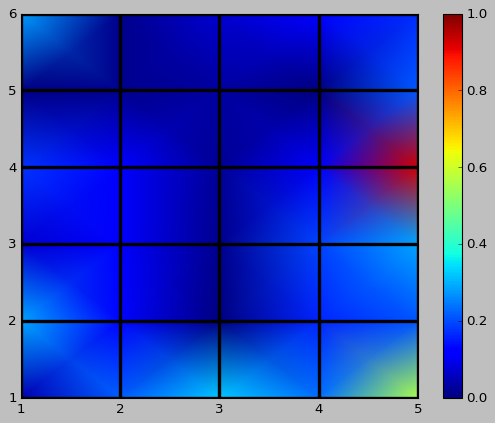

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


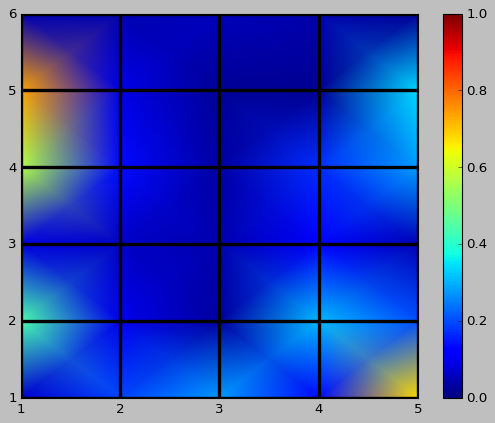

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


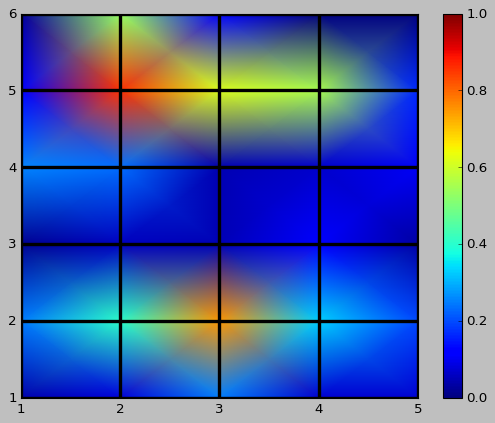

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


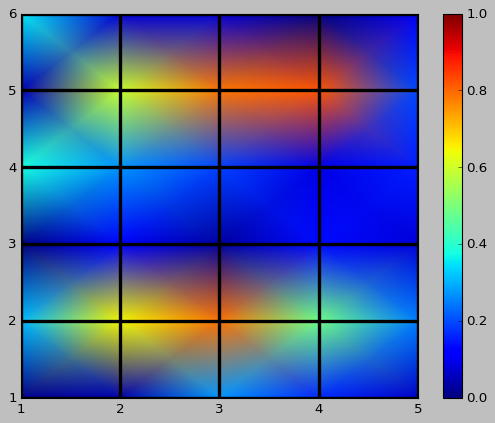

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


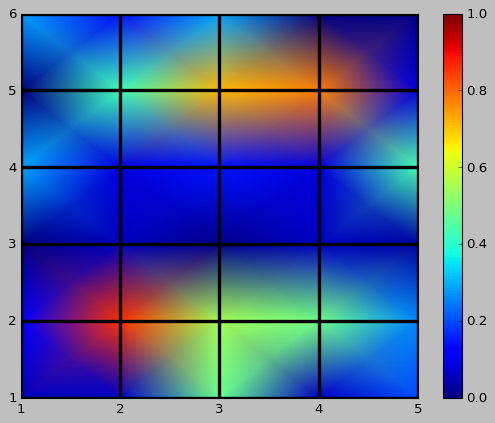

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


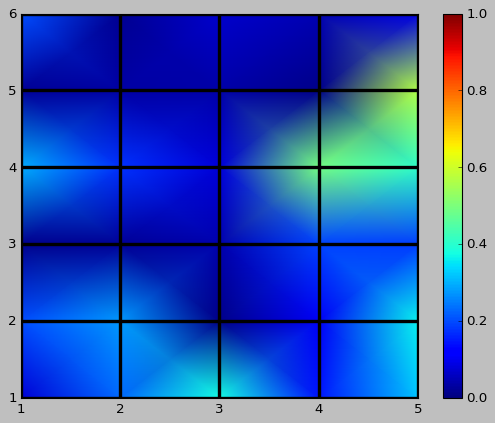

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


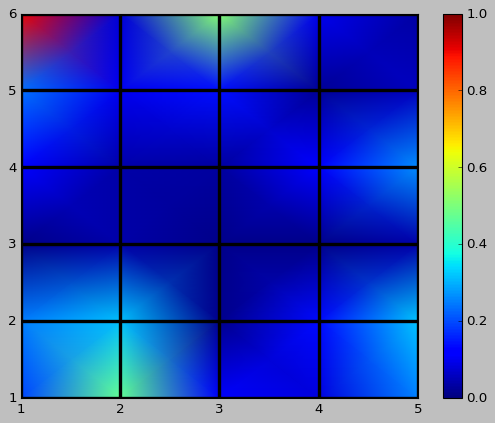

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


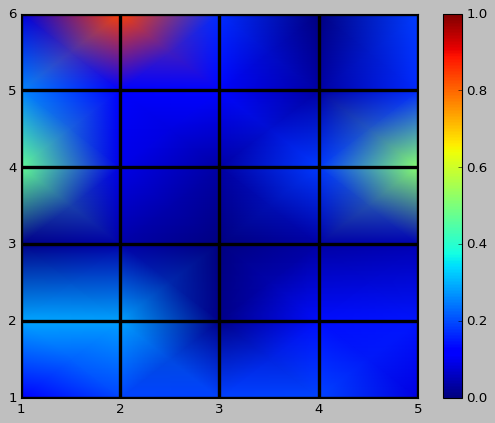

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


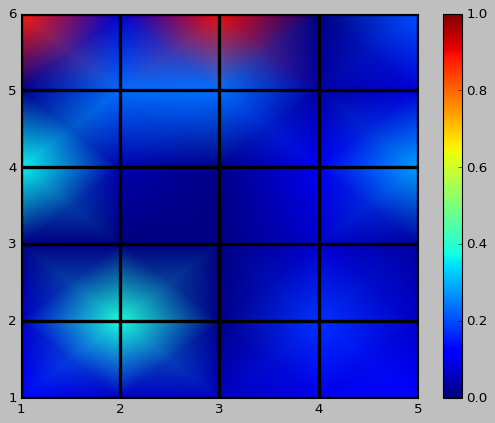

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


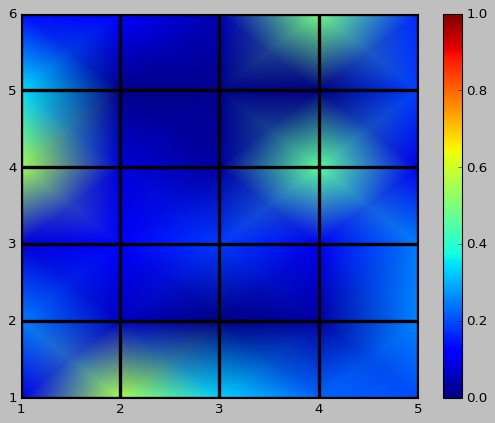

2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


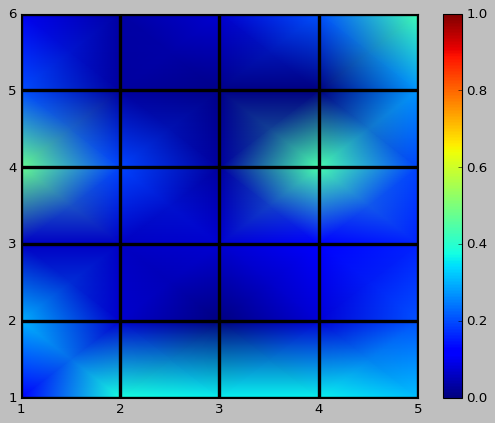

<Figure size 640x480 with 0 Axes>

In [11]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np

models_dir = "/content/drive/MyDrive/FYP/Modell"
imgpath = "/content/drive/MyDrive/FYP/POD/"

for l in testing_dataframes:
  test_data = testing_dataframes[l]
  for j in range(1,31):
    test_frame = create_test_frame(j)
    model_filename = os.path.join(models_dir, f"{j}model.h5")
    model = keras.models.load_model(model_filename)
    test_frame = test_frame.map(lambda x: reshape_element(x))
    prediction = model.predict(test_frame)
    values = np.argmax(prediction,axis=1)

    Damage_detected[j] = 1 ; frames_detected[j] = len(values)
    for value in values:
      if(value==1):
        Damage_detected[j] += 1
    POD[j] = Damage_detected[j]/frames_detected[j]

  with open(f'POD{l}.pkl', 'wb') as f:
    pickle.dump(POD, f)

  # Assuming your POD dictionary has keys from 1 to 30
  pod_values = np.zeros((6, 5))  # Initialize a 6x5 array with zeros

    # Populate the array with values from the POD dictionary
  for i in range(1, 31):
    row = (i - 1) // 5  # Calculate row index
    col = (i - 1) % 5   # Calculate column index
    if i in POD:  # Check if the key exists in POD
      pod_values[row, col] = POD[i]

# Create the plot
  plt.style.use('classic')
  X, Y = np.meshgrid(np.arange(1, 6), np.arange(1, 7))
  ax = plt.pcolormesh(X, Y, pod_values, vmin=0, vmax=1, shading='gouraud')
  plt.locator_params(axis="both", integer=True, tight=True)
  plt.grid(True, color='black', ls='-', lw=3)
  plt.colorbar()
  plt.show()
  plt.savefig(imgpath+ str(l)+"POD.png")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
frames_detected

{1: 2048}

In [ ]:
Damage_detected[1]

644

In [ ]:
for i in POD:
  print(POD[i])

0.314453125


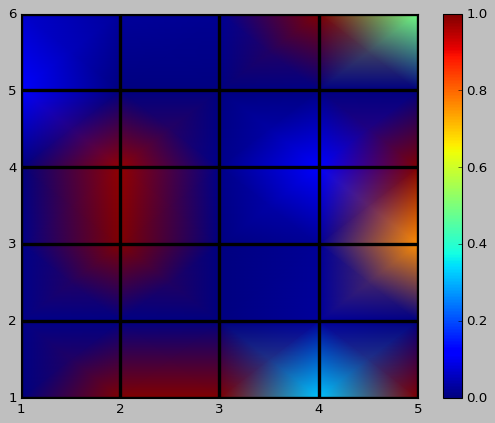

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your POD dictionary has keys from 1 to 30
pod_values = np.zeros((6, 5))  # Initialize a 6x5 array with zeros

# Populate the array with values from the POD dictionary
for i in range(1, 31):
    row = (i - 1) // 5  # Calculate row index
    col = (i - 1) % 5   # Calculate column index
    if i in POD:  # Check if the key exists in POD
        pod_values[row, col] = POD[i]

# Create the plot
plt.style.use('classic')
X, Y = np.meshgrid(np.arange(1, 6), np.arange(1, 7))
ax = plt.pcolormesh(X, Y, pod_values, vmin=0, vmax=1, shading='gouraud')
plt.locator_params(axis="both", integer=True, tight=True)
plt.grid(True, color='black', ls='-', lw=3)
plt.colorbar()
plt.show()